# Práctica Módulo I


## Importamos biblioteca


In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

## Obtención de Datos


In [2]:
API_URL = "https://apidatos.ree.es/es/datos/mercados/precios-mercados-tiempo-real/"   
querystring = {"start_date":"2023-01-01T00:00",
              "end_date":"2023-01-31T23:59",
              "time_trunc":"hour",
              "geo_limit":"peninsular"}
headers = {
    "Accept": "application/json",
"Content-Type": "application/json",
"Host": "apidatos.ree.es"
    }
respuesta = requests.get (API_URL, headers=headers, params=querystring)  #hacemos la petición a la URL
print(json.dumps(respuesta.json(), indent=2, ensure_ascii=False))        #vemos datos recibidos
print("\nCódigo de respuesta: ", respuesta.status_code)                  #Vemos status code

{
  "data": {
    "type": "Precios mercado peninsular en tiempo real",
    "id": "mer13",
    "attributes": {
      "title": "Precios mercado peninsular en tiempo real",
      "last-update": "2023-01-30T20:17:09.000+01:00",
      "description": null
    },
    "meta": {
      "cache-control": {
        "cache": "MISS"
      }
    }
  },
  "included": [
    {
      "type": "PVPC (€/MWh)",
      "id": "1001",
      "groupId": null,
      "attributes": {
        "title": "PVPC (€/MWh)",
        "description": null,
        "color": "#ffcf09",
        "type": null,
        "magnitude": "price",
        "composite": false,
        "last-update": "2023-01-30T20:17:09.000+01:00",
        "values": [
          {
            "value": 41.45,
            "percentage": 1,
            "datetime": "2023-01-01T00:00:00.000+01:00"
          },
          {
            "value": 43.01,
            "percentage": 1,
            "datetime": "2023-01-01T01:00:00.000+01:00"
          },
          {
          

## creamos una tabla plana de los datos importados 

In [3]:
from pandas import json_normalize

In [4]:
resp= respuesta.json()
df =json_normalize(resp["included"])     
df

,type,id,groupId,attributes.title,attributes.description,attributes.color,attributes.type,attributes.magnitude,attributes.composite,attributes.last-update,attributes.values
0,PVPC (€/MWh),1001,None,PVPC (€/MWh),None,#ffcf09,None,price,False,2023-01-30T20:17:09.000+01:00,"[{'value': 41.45, 'percentage': 1, 'datetime':..."
1,Precio mercado spot (€/MWh),600,None,Precio mercado spot (€/MWh),None,#df4a32,None,price,False,2023-01-30T12:55:54.000+01:00,"[{'value': 0, 'percentage': 0, 'datetime': '20..."


# Necessary steps to display what is asked

In [5]:
df1 = pd.DataFrame.from_records(df['attributes.values'])  #creamos un Dataframe con 'value','percentage' y 'datetime'.
df1

,0,1,2,3,4,5,6,7,8,9,...,734,735,736,737,738,739,740,741,742,743
0,"{'value': 41.45, 'percentage': 1, 'datetime': ...","{'value': 43.01, 'percentage': 1, 'datetime': ...","{'value': 58.07, 'percentage': 1, 'datetime': ...","{'value': 60.69, 'percentage': 1, 'datetime': ...","{'value': 62.91, 'percentage': 1, 'datetime': ...","{'value': 61.48, 'percentage': 1, 'datetime': ...","{'value': 63.01, 'percentage': 1, 'datetime': ...","{'value': 60.32, 'percentage': 1, 'datetime': ...","{'value': 67.93, 'percentage': 1, 'datetime': ...","{'value': 64.65, 'percentage': 1, 'datetime': ...",...,"{'value': 172.25, 'percentage': 0.612509778820...","{'value': 172.26, 'percentage': 0.612501777840...","{'value': 174.02, 'percentage': 0.614911660777...","{'value': 194.38, 'percentage': 0.607190828725...","{'value': 266.72, 'percentage': 0.644671645759...","{'value': 317.04, 'percentage': 0.628548770816...","{'value': 304.6, 'percentage': 0.6331587261993...","{'value': 289.89, 'percentage': 0.638088529858...","{'value': 213.19, 'percentage': 0.607638591990...","{'value': 196.96, 'percentage': 0.612133267031..."
1,"{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...","{'value': 0, 'percentage': 0, 'datetime': '202...",...,"{'value': 108.97, 'percentage': 0.387490221179...","{'value': 108.98, 'percentage': 0.387498222159...","{'value': 108.98, 'percentage': 0.385088339222...","{'value': 125.75, 'percentage': 0.392809171274...","{'value': 147.01, 'percentage': 0.355328354240...","{'value': 187.36, 'percentage': 0.371451229183...","{'value': 176.48, 'percentage': 0.366841273800...","{'value': 164.42, 'percentage': 0.361911470141...","{'value': 137.66, 'percentage': 0.392361408009...","{'value': 124.8, 'percentage': 0.3878667329686..."


In [6]:
df2 = df[df.type=='PVPC (€/MWh)']  #obtenemos un DATA FRAME con el precio de venta al público de la energía, PVPC.
df2

,type,id,groupId,attributes.title,attributes.description,attributes.color,attributes.type,attributes.magnitude,attributes.composite,attributes.last-update,attributes.values
0,PVPC (€/MWh),1001,None,PVPC (€/MWh),None,#ffcf09,None,price,False,2023-01-30T20:17:09.000+01:00,"[{'value': 41.45, 'percentage': 1, 'datetime':..."


In [7]:
df3 = pd.DataFrame.from_records(df2['attributes.values']) #seleccionando valores dentro de 'attributes'
df3

,0,1,2,3,4,5,6,7,8,9,...,734,735,736,737,738,739,740,741,742,743
0,"{'value': 41.45, 'percentage': 1, 'datetime': ...","{'value': 43.01, 'percentage': 1, 'datetime': ...","{'value': 58.07, 'percentage': 1, 'datetime': ...","{'value': 60.69, 'percentage': 1, 'datetime': ...","{'value': 62.91, 'percentage': 1, 'datetime': ...","{'value': 61.48, 'percentage': 1, 'datetime': ...","{'value': 63.01, 'percentage': 1, 'datetime': ...","{'value': 60.32, 'percentage': 1, 'datetime': ...","{'value': 67.93, 'percentage': 1, 'datetime': ...","{'value': 64.65, 'percentage': 1, 'datetime': ...",...,"{'value': 172.25, 'percentage': 0.612509778820...","{'value': 172.26, 'percentage': 0.612501777840...","{'value': 174.02, 'percentage': 0.614911660777...","{'value': 194.38, 'percentage': 0.607190828725...","{'value': 266.72, 'percentage': 0.644671645759...","{'value': 317.04, 'percentage': 0.628548770816...","{'value': 304.6, 'percentage': 0.6331587261993...","{'value': 289.89, 'percentage': 0.638088529858...","{'value': 213.19, 'percentage': 0.607638591990...","{'value': 196.96, 'percentage': 0.612133267031..."


In [8]:
df4 =pd.DataFrame()             #desanidar valores de df3 a nuevo dataframe df4 usando bucle FOR.
for i in range(df3.shape[1]):  
    df4=pd.concat([df4, pd.DataFrame.from_records(df3[i])], ignore_index=True)
print (df4.info())
df4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       744 non-null    float64
 1   percentage  744 non-null    float64
 2   datetime    744 non-null    object 
dtypes: float64(2), object(1)
memory usage: 17.6+ KB
None


,value,percentage,datetime
0,41.45,1.000000,2023-01-01T00:00:00.000+01:00
1,43.01,1.000000,2023-01-01T01:00:00.000+01:00
2,58.07,1.000000,2023-01-01T02:00:00.000+01:00
3,60.69,1.000000,2023-01-01T03:00:00.000+01:00
4,62.91,1.000000,2023-01-01T04:00:00.000+01:00
...,...,...,...
739,317.04,0.628549,2023-01-31T19:00:00.000+01:00
740,304.60,0.633159,2023-01-31T20:00:00.000+01:00
741,289.89,0.638089,2023-01-31T21:00:00.000+01:00
742,213.19,0.607639,2023-01-31T22:00:00.000+01:00


In [9]:
df4 = df4.drop(columns=['percentage'])   #Eliminando la columna "percentage"
df4

,value,datetime
0,41.45,2023-01-01T00:00:00.000+01:00
1,43.01,2023-01-01T01:00:00.000+01:00
2,58.07,2023-01-01T02:00:00.000+01:00
3,60.69,2023-01-01T03:00:00.000+01:00
4,62.91,2023-01-01T04:00:00.000+01:00
...,...,...
739,317.04,2023-01-31T19:00:00.000+01:00
740,304.60,2023-01-31T20:00:00.000+01:00
741,289.89,2023-01-31T21:00:00.000+01:00
742,213.19,2023-01-31T22:00:00.000+01:00


## calculamos la media, la varianza y la desviación típica del PVPC de la energía

In [10]:
media = df4.value.mean().round(2)
varianza = df4.value.var().round(2)
desviación_típica = df4.value.std().round(2)   

print("la media es",media)
print("la varianza es",varianza)
print("la desviación típica es",desviación_típica)

la media es 131.57
la varianza es 5352.35
la desviación típica es 73.16


In [11]:
df4.describe()      # La media y la desviación típica también se pueden observar usando "describe()"

,value
count,744.000000
mean,131.569785
std,73.159730
min,20.830000
25%,69.280000
50%,118.540000
75%,180.975000
max,357.200000


## Añadimos representación gráfica

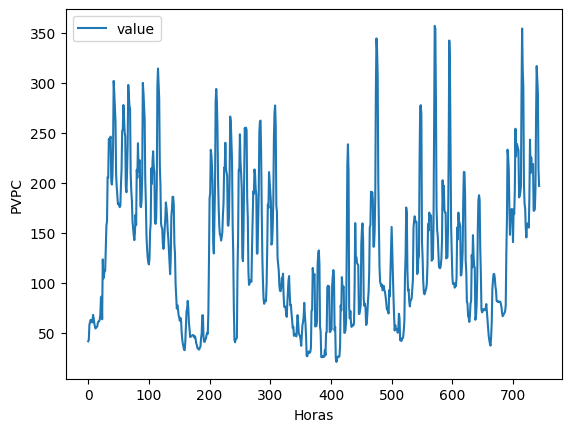

In [16]:

plt.plot(df4.index,df4.value ,label = 'value')     # Representando valores PVPC frente a horas(index)
plt.xlabel('Horas') 
plt.ylabel('PVPC') 
plt.legend(loc="upper left")  
plt.show() 